# Social Network Analysis_Ego_Network_Facebook_Predicting_Friendships

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean

import networkx as nx

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from math import exp

Dataset name : facebook_combined.txt.gz

In [4]:
G1 = nx.read_edgelist('facebook_combined.txt.gz')

Basic information of the loaded graph

In [5]:
print("Number of nodes:", G1.number_of_nodes())
print("Number of edges:", G1.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


Calculates the degrees of each node

In [6]:
degrees = [G1.degree(node) for node in G1.nodes()]
print("Degree distribution:", degrees)

Degree distribution: [347, 17, 10, 17, 10, 13, 6, 20, 8, 57, 10, 1, 1, 31, 15, 1, 9, 13, 1, 16, 15, 65, 11, 17, 16, 69, 68, 5, 13, 13, 17, 23, 6, 2, 5, 2, 11, 1, 9, 15, 44, 24, 2, 1, 6, 12, 5, 2, 22, 4, 11, 7, 2, 31, 8, 17, 78, 15, 12, 19, 8, 3, 26, 6, 7, 12, 15, 76, 9, 10, 2, 3, 24, 10, 1, 14, 3, 6, 9, 12, 23, 3, 34, 7, 13, 14, 6, 13, 20, 8, 2, 8, 21, 8, 22, 6, 9, 3, 49, 13, 9, 19, 6, 16, 32, 14, 8, 1045, 13, 37, 5, 14, 3, 40, 1, 21, 17, 6, 36, 62, 4, 12, 63, 18, 4, 4, 7, 16, 28, 7, 16, 7, 16, 18, 19, 10, 133, 16, 2, 9, 11, 28, 43, 12, 15, 2, 10, 6, 20, 14, 11, 7, 5, 2, 2, 3, 12, 3, 25, 14, 2, 25, 8, 6, 3, 11, 4, 7, 11, 38, 46, 22, 41, 12, 4, 17, 14, 11, 13, 3, 20, 10, 3, 2, 18, 26, 44, 16, 48, 7, 4, 3, 5, 5, 19, 9, 13, 16, 12, 47, 57, 4, 4, 57, 22, 2, 4, 3, 7, 1, 1, 30, 18, 39, 17, 1, 2, 8, 9, 6, 4, 8, 11, 27, 28, 10, 14, 15, 3, 6, 9, 21, 25, 2, 2, 5, 37, 7, 23, 59, 3, 2, 24, 8, 2, 5, 14, 3, 21, 24, 5, 14, 65, 3, 17, 2, 2, 18, 15, 8, 8, 38, 4, 7, 5, 27, 18, 2, 11, 6, 4, 73, 45, 9, 14

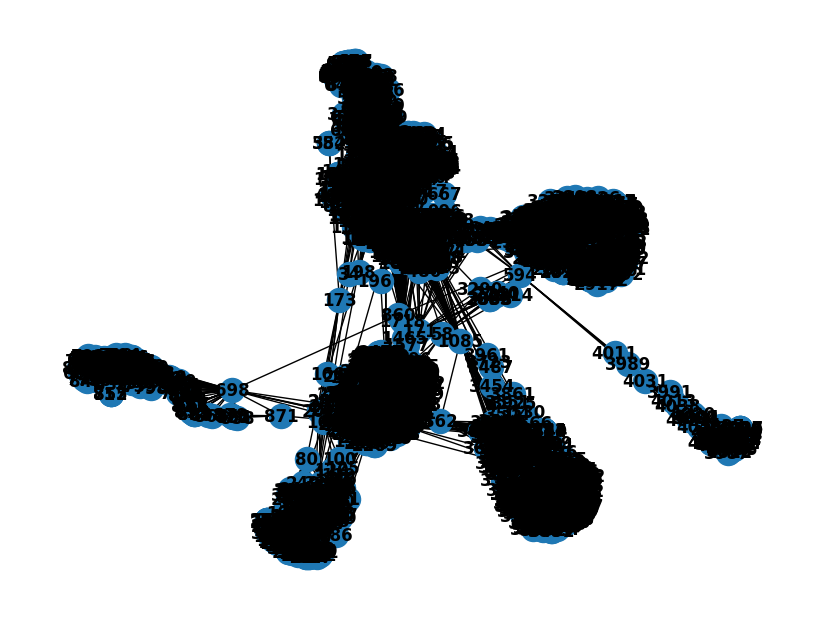

In [7]:
plt.figure(figsize=(8, 6))
nx.draw(G1, with_labels=True, font_weight='bold')
plt.show()

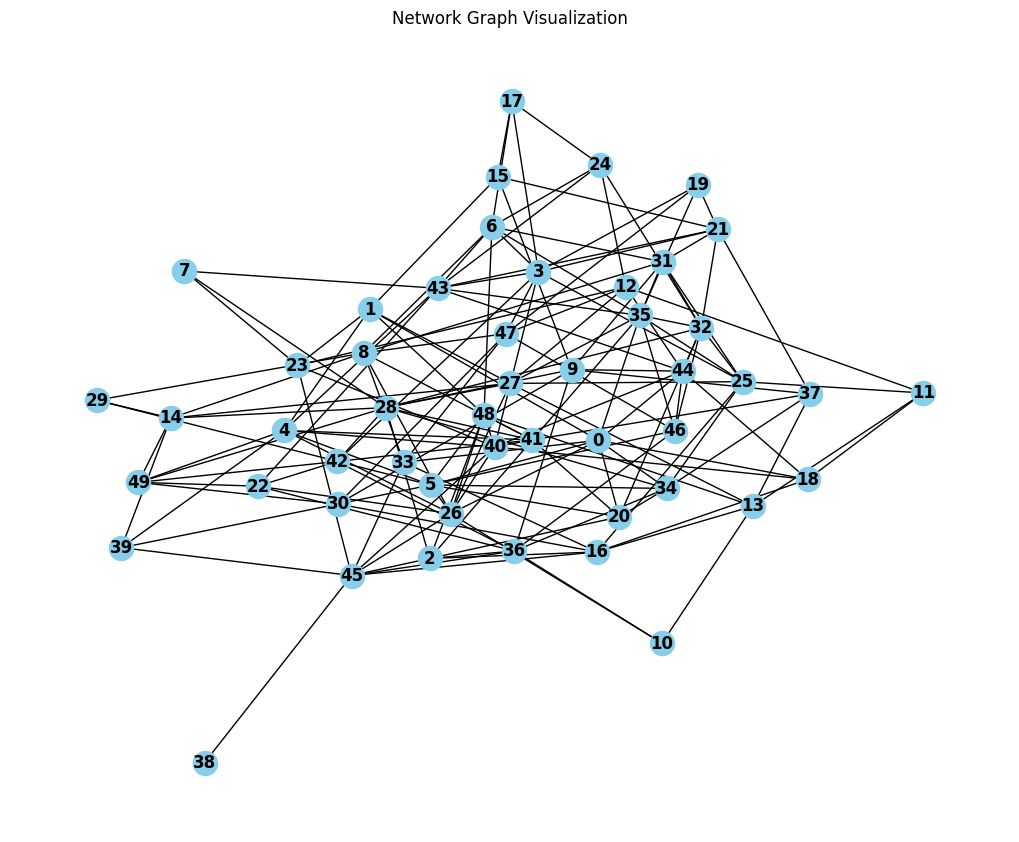

In [8]:
#random graph for demonstration
G = nx.erdos_renyi_graph(50, 0.15)

#layout algorithm
layout = nx.spring_layout(G)

#draw the graph with node labels and different node colors
plt.figure(figsize=(10, 8))
nx.draw(G, pos=layout, with_labels=True, node_color='skyblue', font_weight='bold', node_size=300)
plt.title("Network Graph Visualization")
plt.show()

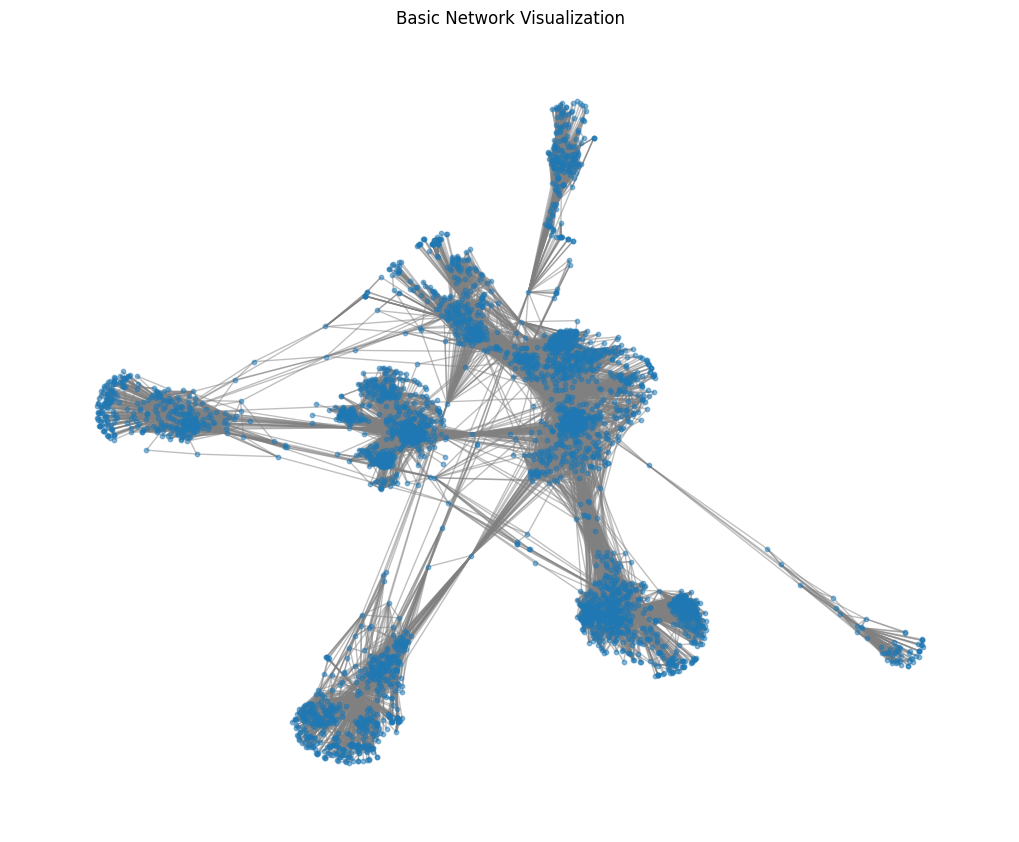

In [9]:
plt.figure(figsize=(10, 8))
nx.draw(G1, with_labels=False, node_size=10, edge_color='gray', alpha=0.5)
plt.title("Basic Network Visualization")
plt.show()


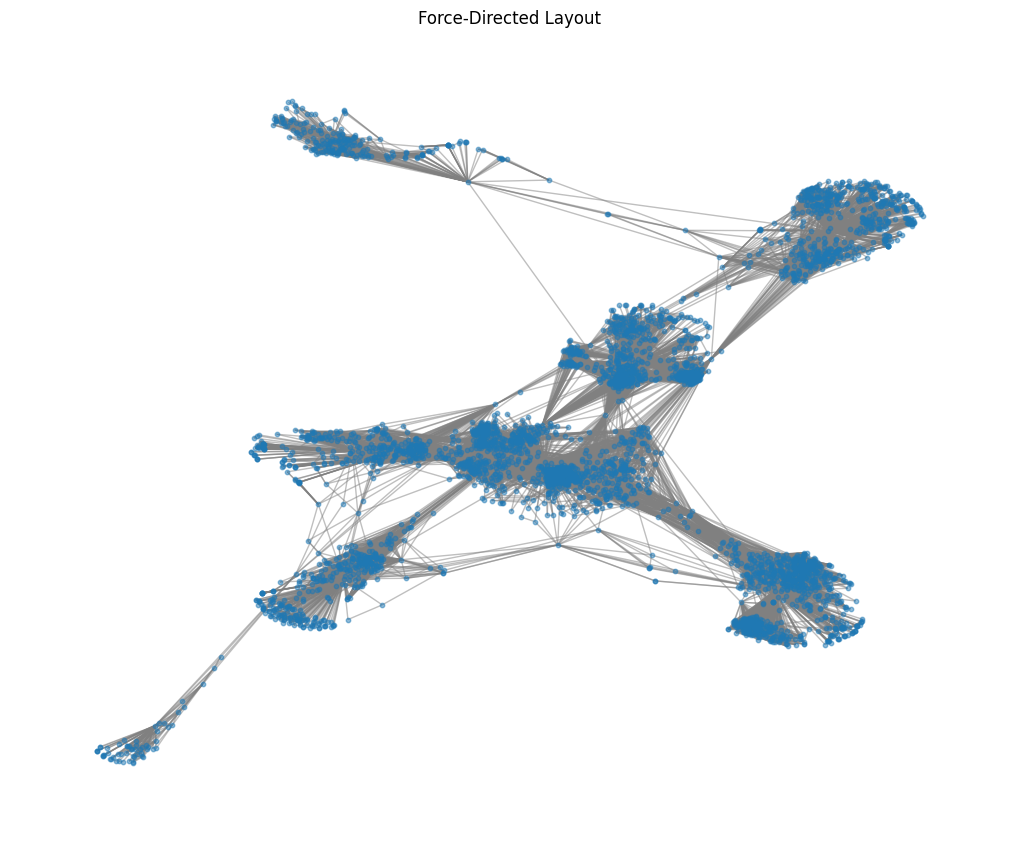

In [12]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G1)
nx.draw(G1, pos=pos, with_labels=False, node_size=10, edge_color='gray', alpha=0.5)
plt.title("Force-Directed Layout")
plt.show()


### Degree Centrality 

Assumption: important nodes have many connections.
The most basic measure of centrality : number of neighbors.

In [16]:
def degree_centrality(G1):
    #to find the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    degree_centrality = nx.degree_centrality(G1) #degree centrality for each node in the graph

    #iterate through all nodes to find the one with highest degree centrality
    for i in G1.nodes() : 
        if (degree_centrality[i]> maximum)  : 
            maximum = degree_centrality[i]
            node = i 
    
    #print(node)
    return node 

In [18]:
def top_percent_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())  #by default per = 0.02


    #iterate to find the top nodes based on the degree centrality
    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        # Remove the node from the dictionary to avoid selecting it again    
        del dic[node]

        lis.append(node)  #add the selected node to the list
        
    lis_degree=lis  #store top nodes based on DC
    
    #print(lis_degree)
    return lis_degree

###  Closeness centrality

Assumption: important nodes are close to other nodes.

In [19]:
def closeness_centrality(G1):  #closeness centrality measures how close a node is to all other nodes in the graph
    
    maximum = 0 
    node = 0
    closeness_centrality = nx.closeness_centrality(G1) #calculate the closeness centrality for each node in the graph
    for i in G1.nodes() : 
        if closeness_centrality[i]> maximum  :   #check if current node CC is less/more than curr max CC
            maximum = closeness_centrality[i]  #update accordingly
            node = i 
    
    #print(node)
    return node 

In [20]:
def top_percent_closeness_centrality(G1 , per = 0.02 ):
    closeness_centrality = nx.closeness_centrality(G1)

    lis=[]
    dic = dict(closeness_centrality)

    #Top percent of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]

        lis.append(node)
    lis_closeness=lis
    
    #print(lis_closeness)
    return lis_closeness

### Betweenness Centrality

Assumption: important nodes connect other nodes.

In [21]:
def betweenness_centrality(G1):   #betweenness centrality measures how often a node acts as a bridge along the shortest path between other nodes in the graph. 
    maximum = 0  #initialize var to track the max betweenness centrality and corresponding node
    node = 0
    betweenness_centrality = nx.betweenness_centrality(G1)
    for i in G1.nodes() : 
        if betweenness_centrality[i]> maximum  :  #check if the betweenness centrality of the curr node is greater than the curr max
            maximum = betweenness_centrality[i]
            node = i 
            
    #print(node)
    return node 

In [22]:
def top_percent_betweenness_centrality(G1 , per = 0.02):
    betweenness_centrality = nx.betweenness_centrality(G1)

    lis=[]
    dic = dict(betweenness_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) : 
        maximum = 0 
        node = 0
        for elt in dic :  #find the node with the highest betweenness centrality in the remaining nodes
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_betweenness=lis
    
    #print(lis_betweenness)
    return lis_betweenness

### Functions about influency 

In [23]:
def polyvalent_influence (list1,list2,list3) :
    #considering a person is polyvalent influencer if he is in top percent in the three classifications
     
    #uses list comprehension to iterate through list1 and checks if the current element (x) is present in both list2 and list3. 
    #ff it is, the element x is added to the resulting list of polyvalent influencers.
    return [x for x in list1 if x in list2 and x in list3]

In [24]:
def list_of_components (components) : 
    #list where each set represents a component of nodes.
    
    list_of_components=[]
    count = 0
    for com in components :
        list_nodes=list(com)   #convert the component set -> list of nodes
        list_of_components.append(list_nodes)
    
    return list_of_components

In [25]:
# function to calculate the avg of the three parameters of centrality for the k th community 

def extracting_graph_community (k,list_of_communities,numpy_matrix): 
    sample_array = np.array(numpy_matrix)

    list_edges_community_k = []
    for i in range(sample_array.shape[0]): 
        if sample_array[i][0] in list_of_communities[k] : 
            if sample_array[i][1] in list_of_communities[k] : 
                list_edges_community_k.append([sample_array[i][0],sample_array[i][1]])
            
    # creating an array of the k th community 
    sample_array=np.array(list_edges_community_k)

    # creating the G_sample graph of the k th community 
    
    # Instantiate the graph
    G_sample = nx.Graph()
    # add node/edge pairs
    G_sample.add_edges_from(sample_array)
    
    degree_centrality = nx.degree_centrality(G_sample)
    closeness_centralirty = nx.closeness_centrality(G_sample)
    betweenness_centrality = nx.betweenness_centrality(G_sample)
    
    avg_degree = mean(degree_centrality.values())
    avg_closeness = mean(closeness_centralirty.values())
    avg_betweenness = mean(betweenness_centrality.values())
    
    
    radius = nx.radius(G_sample)
    diameter = nx.diameter(G_sample)
    avg_shortest_path = nx.average_shortest_path_length(G_sample)
    
    smallest_bridge_number = nx.node_connectivity(G_sample)
    
    return (avg_degree,avg_closeness,avg_betweenness,radius,diameter,smallest_bridge_number,avg_shortest_path)

### Graph functions

In [26]:
def draw_graph (G_sample):
    # draw the network G1
    pos=nx.spring_layout(G_sample)
    fig= plt.figure(figsize=(20,10))
    nx.draw_networkx(G_sample,pos,with_labels=False,node_size=50,node_color='b',edge_color='Gray',alpha=0.9)
    return 

In [27]:
def color_nodes (G_sample,list) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G_sample.nodes() :
        if node in list :
            color_map.append('red')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G_sample,node_color = color_map,with_labels=False,node_size=18,edge_color='Gray',alpha=0.8)
    plt.show()

In [28]:
def color_list_of_nodes_in_graph (list1 , list2 , G ,node_size=40) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=40,edge_color='Gray',alpha=0.9)
    plt.show()

In [29]:
def color_list_of_nodes_in_graph_centrality (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*100)) #calculate node size based on the provided centrality values
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [30]:
def color_quadriple_list_of_nodes_in_graph_centrality (list1 , list2 , list3 ,list4 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        elif node in list3 :
            color_map.append('Black')
        elif node in list4 : 
            color_map.append('Yellow')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*10))
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [40]:
def color_list_of_nodes_in_graph_centrality_weight (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*1000))
    
    edges , weights = zip(*nx.get_edge_attributes(G,'weight').items())  # Get the edges and their weights from the graph
    
    listing = []
    for weight in weights : 
        listing.append(exp(weight+1)*1000)
    weight = tuple (listing)
    
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,font_color ='white',edgelist=edges,edge_color=weight ,edge_cmap = plt.cm.Blues ,with_labels=True,node_size=size_map,alpha=0.9)
    plt.show()

### Read functions 

In [42]:
def read_edges(f) : 
    # read edges from txt file 
    list_edges = []
    for x in f:
        v_0=x.split(' ')
        v_1=v_0[1].split('\n')  #second vertex to remove the newline character
        list_edges.append([int(v_0[0]),int(v_1[0])])  #append the pair of vertices as a list
        numpy_matrix=np.array(list_edges)    
    return numpy_matrix

In [43]:
def read_circles (c_0) :  #reads data from a list of strings and processes it to extract a list of integer values
    list = []
    for x in c_0 : 
        v=x.split('\t')
        v[-1]=(v[-1].split('\n'))[0]
        v.pop(0)
        for i in range(len(v)) : 
            v[i]=int(v[i])
        list.append(v)  #append the processed list of integers
    return list

In [34]:
def read_feat(fe):  #reads data from a list of strings and processes it to extract a list of lists containing integer values.
    liste=[]
    for x in fe : 
        v=x.split(' ')
        v.pop(0)
        v[-1]=v[-1][0]
        for i in range(len(v)): 
            v[i]=int(v[i])
        liste.append(v)
    return (liste)
    

In [44]:
def read_eg_feat(fe):
    liste=[]
    for x in fe : 
        v=x.split(' ')
        v[-1]=v[-1][0]  #remove the last character from the last value
        for i in range(len(v)): 
            v[i]=int(v[i])
        liste.append(v)
    return (liste)    

## Reading Data  Ego_Network

In [50]:
# Input the network number for the analysis : 0/107/348/414/686/698/1684/1912/3437/3980
network_number = 0

In [51]:
ch = str(network_number)
edges = ch+".edges"
feat = ch+".feat"
egofeat = ch+".egofeat"
circles = ch+".circles"

In [54]:
f_0 = open(edges, "r")
numpy_matrix_0 = read_edges(f_0)

In [55]:
import networkx as nx

In [56]:
# Instantiate the graph
G0 = nx.Graph()
# add node/edge pairs
G0.add_edges_from(numpy_matrix_0)

In [57]:
G0.number_of_nodes()

19

In [58]:
G0.number_of_edges()

10

In [60]:
# Add edges from each non-zero node to node 0
edges_to_add = [(node, 0) for node in G0.nodes() if node != 0]
G0.add_edges_from(edges_to_add)

In [61]:
for node in G0.nodes() : 
    if node != 0 :
        G0.add_edge (node,0)

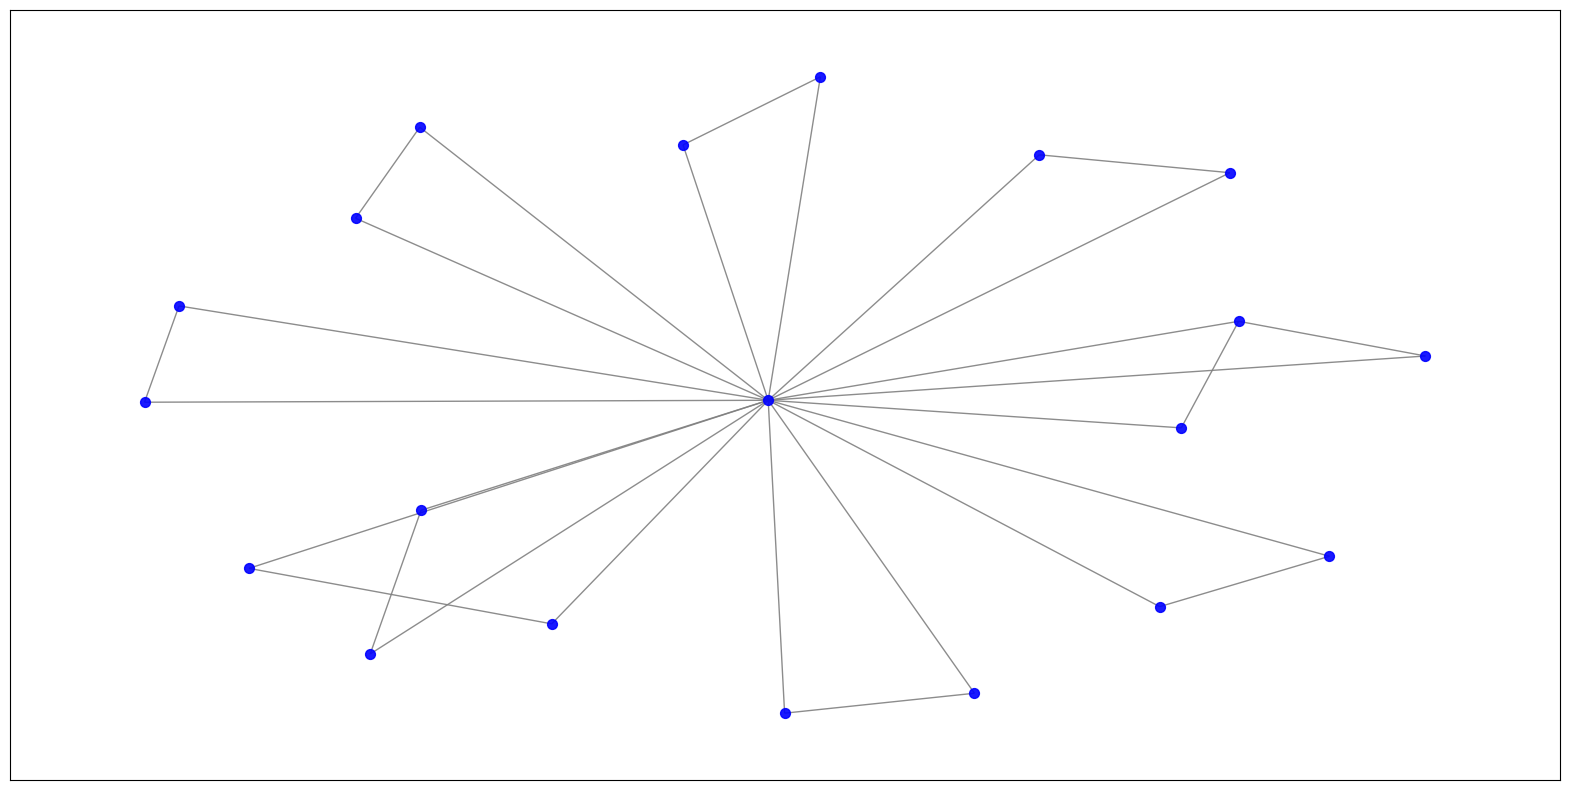

In [64]:
draw_graph(G0)

### Analysis of the Graph 

In [65]:
len(G0.nodes())

20

In [66]:
#by definition of the data the graph is totally connected 
nx.is_connected(G0)

True

In [67]:
# some metrics 
degree_centrality = nx.degree_centrality(G0)
closeness_centralirty = nx.closeness_centrality(G0)
betweenness_centrality = nx.betweenness_centrality(G0)
    
avg_degree = mean(degree_centrality.values())
avg_closeness = mean(closeness_centralirty.values())
avg_betweenness = mean(betweenness_centrality.values())
        
radius = nx.radius(G0)
diameter = nx.diameter(G0)
avg_shortest_path = nx.average_shortest_path_length(G0)
        
smallest_bridge_number = nx.node_connectivity(G0)

In [68]:
dic = {'Node_Id' :list(G0.nodes()) , 'Deg_Cent' : list(degree_centrality.values()) , 'Clo_Cent' : list(closeness_centralirty.values()) , 'Bet_Cent' : list(betweenness_centrality.values())}

In [69]:
community_details = pd.DataFrame(dic)

In [70]:
community_details.head(20)

,Node_Id,Deg_Cent,Clo_Cent,Bet_Cent
0,54,0.105263,0.527778,0.000000
1,13,0.105263,0.527778,0.000000
2,55,0.157895,0.542857,0.002924
3,91,0.105263,0.527778,0.000000
4,90,0.105263,0.527778,0.000000
5,22,0.105263,0.527778,0.000000
6,67,0.105263,0.527778,0.000000
7,30,0.105263,0.527778,0.000000
8,32,0.105263,0.527778,0.000000
9,70,0.105263,0.527778,0.000000


In [71]:
community_details.describe()

,Node_Id,Deg_Cent,Clo_Cent,Bet_Cent
count,20.000000,20.000000,20.000000,20.000000
mean,50.600000,0.152632,0.552143,0.047076
std,29.614008,0.199796,0.105468,0.209843
min,0.000000,0.105263,0.527778,0.000000
25%,31.500000,0.105263,0.527778,0.000000
50%,50.500000,0.105263,0.527778,0.000000
75%,71.500000,0.105263,0.527778,0.000000
max,99.000000,1.000000,1.000000,0.938596


In [72]:
radius

1

In [73]:
diameter

2

In [74]:
avg_shortest_path

1.8473684210526315

In [75]:
smallest_bridge_number

1

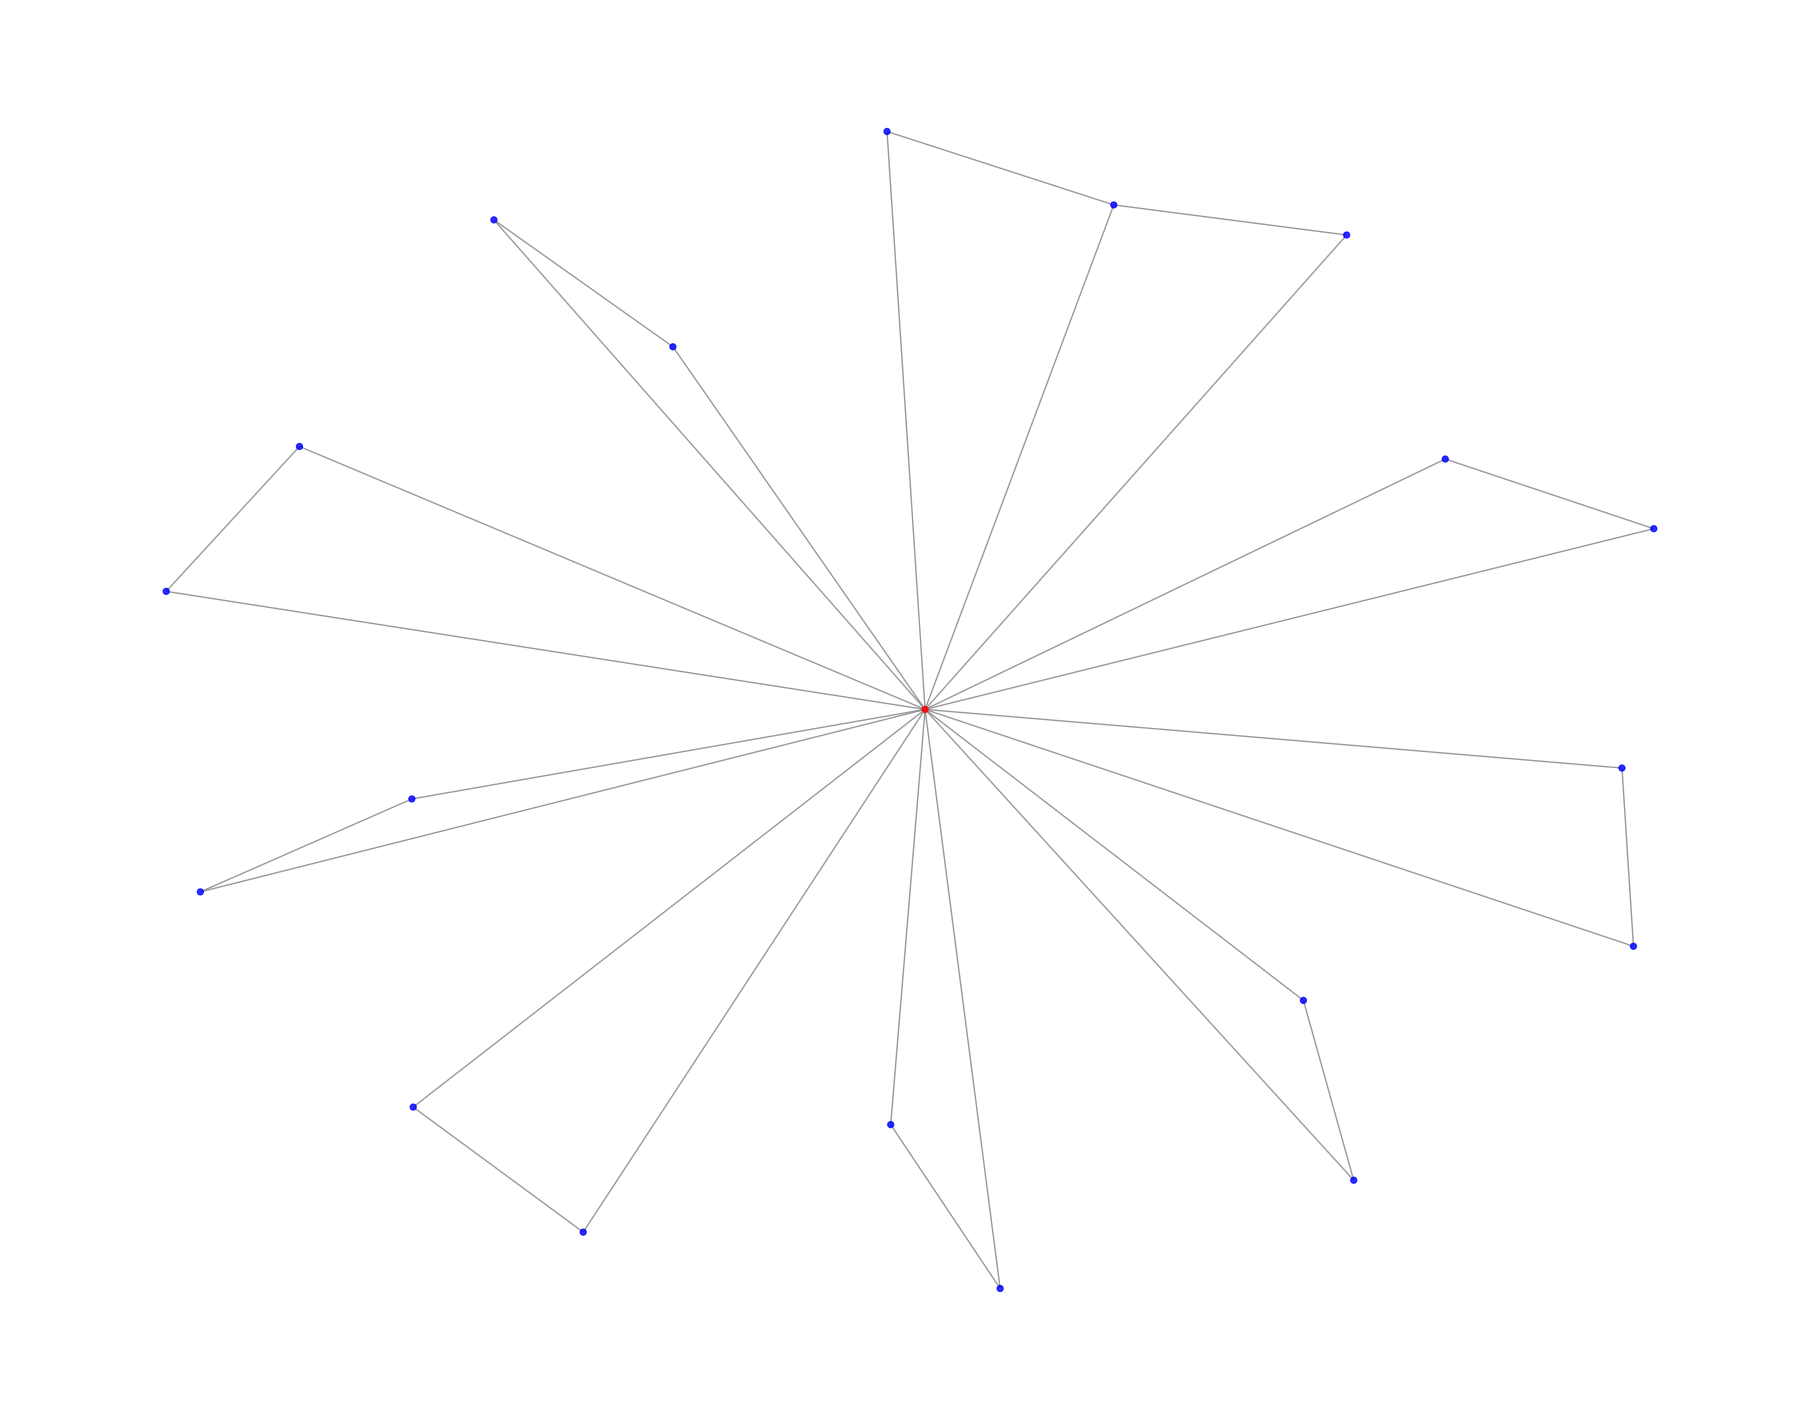

In [76]:
ego_list=[0]
color_nodes (G0,ego_list)

### Finding influencers in the Graph 